# ¿A quién le mostramos publicidad?

Contamos con un conjunto de datos de usuarios de Redes Sociales que compraro o no compraron productos en línea.

## 1. Análisis Exploratorio de Datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Importing the dataset

In [2]:
data = pd.read_csv('data/Social_Network_Ads.csv')

data = data[["Gender", "Age", "EstimatedSalary", "Purchased"]]

print(data.shape)
data.head(5)

(400, 4)


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [4]:
data.tail()

,Gender,Age,EstimatedSalary,Purchased
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
data.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

## Análisis univariable
### Gender

In [7]:
gender = data["Gender"]
gender.describe()

count        400
unique         2
top       Female
freq         204
Name: Gender, dtype: object

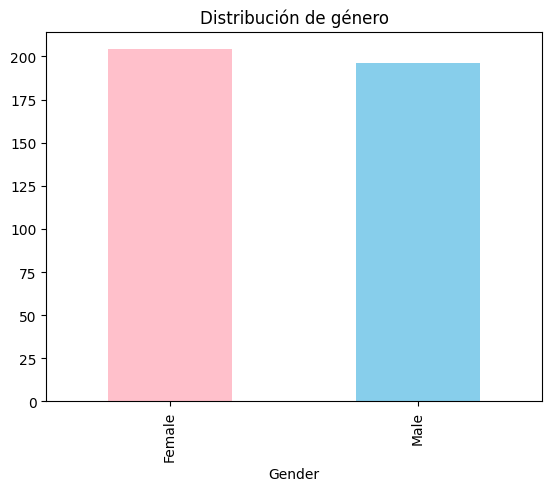

In [8]:
gender.value_counts().plot(kind="bar", color=["pink", "skyblue"]);
plt.title("Distribución de género")
plt.show()

### Age

In [9]:
age = data["Age"]
age.describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

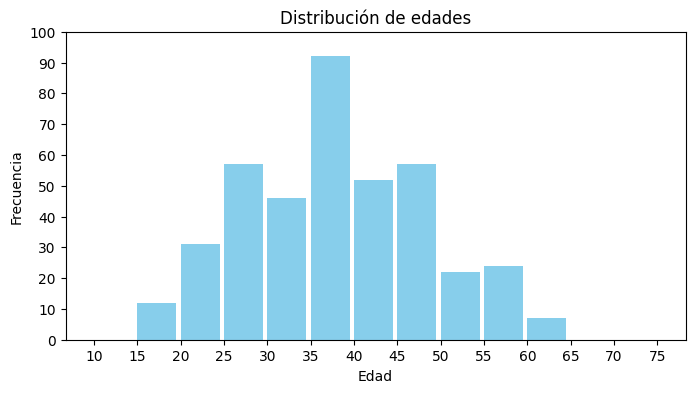

In [10]:
xticks = range(10,80,5)
age.plot(kind="hist", color='skyblue', bins=xticks, width=4.5, figsize=(8,4));
plt.xticks(xticks)
plt.yticks(range(0,101,10))
plt.title("Distribución de edades");
plt.xlabel("Edad");
plt.ylabel("Frecuencia");


#### Análisis de tendencia central

In [11]:
print("Media:", age.mean())

Media: 37.655


In [12]:
print("Mediana:", age.median())

Mediana: 37.0


In [13]:
print("Moda:", age.mode());

Moda: 0    35
Name: Age, dtype: int64


La similitud entre la media y la mediana indica que los datos de edad son siméstricos, es decir, siguen una distribución normal y existe un similar representación de datos a ambos lados de la moda.

#### Medidas de dispersión

In [14]:
# Desviación estándar
std_deviation = age.std()
print("Desviación estándar de la edad:", std_deviation)

# Calcular el rango intercuartílico (IQR)
Q1 = age.quantile(0.25)
print("Q1", Q1)
Q3 = age.quantile(0.75)
print("Q3", Q3)
IQR = Q3 - Q1
print("Rango intercuartílico (IQR) de la edad:", IQR)

Desviación estándar de la edad: 10.482876597307914
Q1 29.75
Q3 46.0
Rango intercuartílico (IQR) de la edad: 16.25


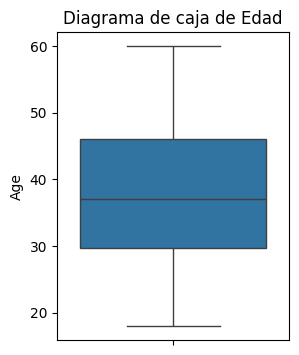

In [15]:
fig, ax = plt.subplots(figsize=(3, 4)) 
sns.boxplot(age);
plt.title("Diagrama de caja de Edad");
plt.show()

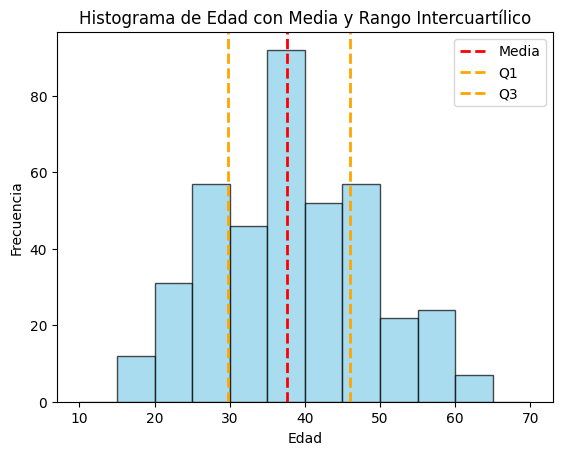

In [16]:
xbins = range(10, 71, 5)
plt.hist(age, bins=xbins, color='skyblue', edgecolor='black', alpha=0.7)

plt.axvline(age.mean(), color='red', linestyle='--', linewidth=2, label='Media')
plt.axvline(Q1, color='orange', linestyle='--', linewidth=2, label='Q1')
plt.axvline(Q3, color='orange', linestyle='--', linewidth=2, label='Q3')

plt.legend()
plt.title('Histograma de Edad con Media y Rango Intercuartílico')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Estimated Salary

In [17]:
salary = data["EstimatedSalary"]
salary.describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

In [18]:
salary.info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: EstimatedSalary
Non-Null Count  Dtype
--------------  -----
400 non-null    int64
dtypes: int64(1)
memory usage: 3.3 KB


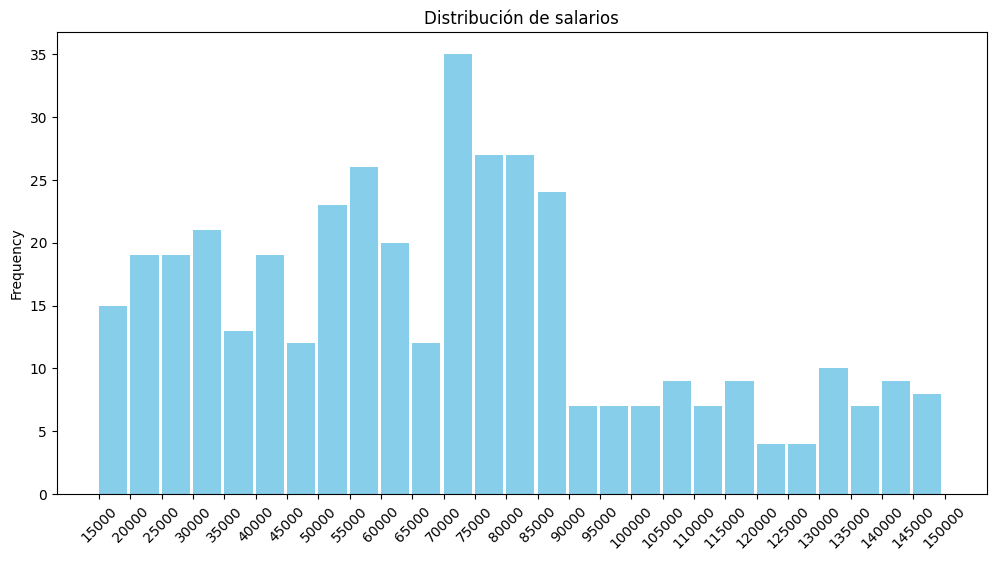

In [19]:
xbins = range(15000, 150001, 5000)
salary.plot(kind="hist", color="skyblue", bins=xbins, figsize=(12,6), width=4500)
plt.title("Distribución de salarios")
plt.xticks(xbins, rotation=45);
plt.show();

#### Tendencia Central

In [20]:
salary.mean()

69742.5

In [21]:
salary.median()

70000.0

In [22]:
salary.mode()

0    72000
Name: EstimatedSalary, dtype: int64

In [23]:
std_salary = salary.std()
print("Desviación estándar del salario:", std_salary)

Q1 = salary.quantile(0.25)
print("Q1", Q1)
Q3 = salary.quantile(0.75)
print("Q3", Q3)
IQR = Q3 - Q1
print("Rango intercuartílico (IQR) del salario", IQR)

Desviación estándar del salario: 34096.960282424785
Q1 43000.0
Q3 88000.0
Rango intercuartílico (IQR) del salario 45000.0


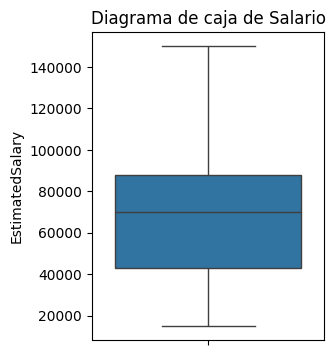

In [24]:
fig, ax = plt.subplots(figsize=(3, 4)) 
sns.boxplot(salary);
plt.title("Diagrama de caja de Salario");
plt.show()

### Purchased

In [25]:
purchased = data["Purchased"]
purchased.describe()

count    400.000000
mean       0.357500
std        0.479864
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Purchased, dtype: float64

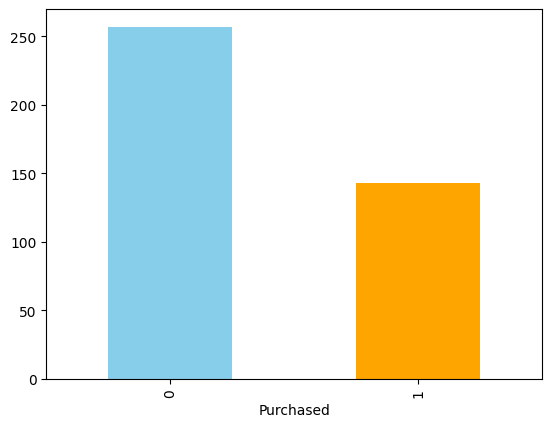

In [26]:
purchased.value_counts().plot(kind="bar", color=["skyblue", "orange"]);

## Análisis Multivariable

#### Age vs Purchased

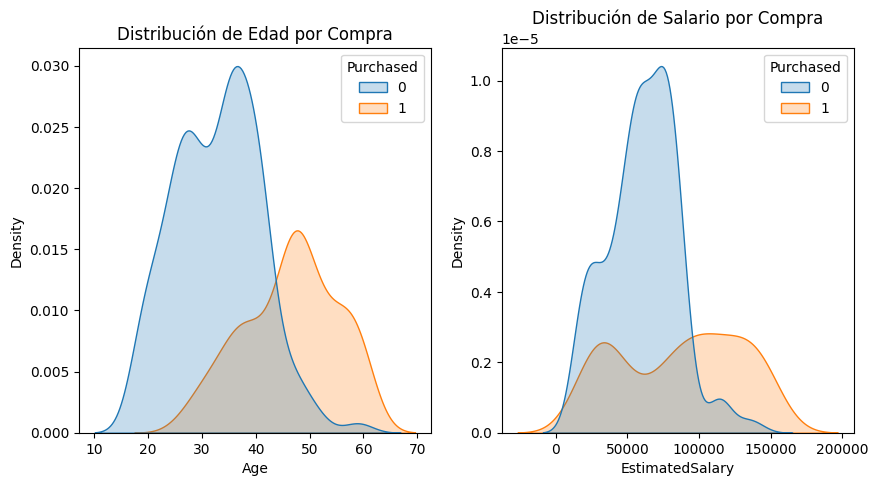

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.kdeplot(data=data, x='Age', hue='Purchased', fill=True)
plt.title('Distribución de Edad por Compra');

plt.subplot(1, 2, 2)
sns.kdeplot(data=data, x='EstimatedSalary', hue='Purchased', fill=True)
plt.title('Distribución de Salario por Compra')
plt.show();

#### Purchased vs Gender

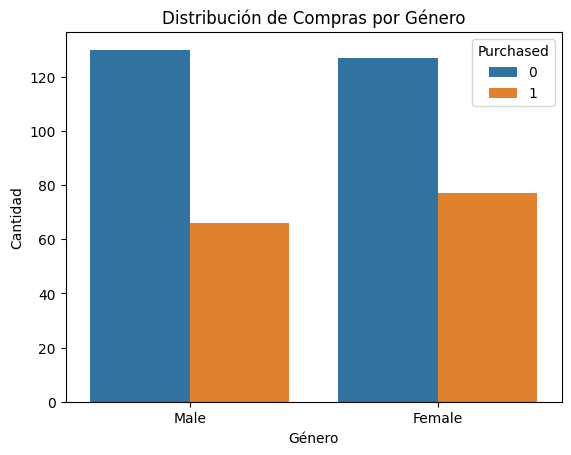

In [28]:
sns.countplot(data=data, x='Gender', hue='Purchased')
plt.title('Distribución de Compras por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

#### Age vs Salary vs Purchased

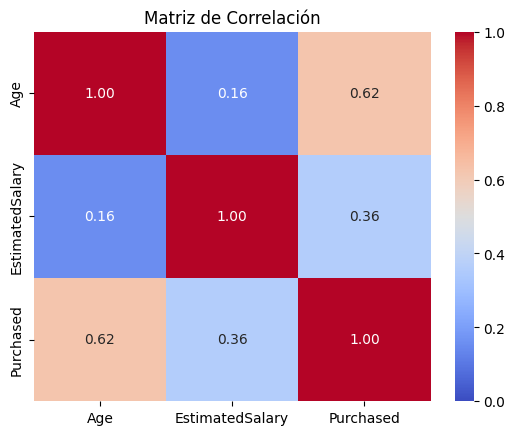

In [29]:
cont_data = data[["Age", "EstimatedSalary", "Purchased"]]
correlation_matrix = cont_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

#### All variables

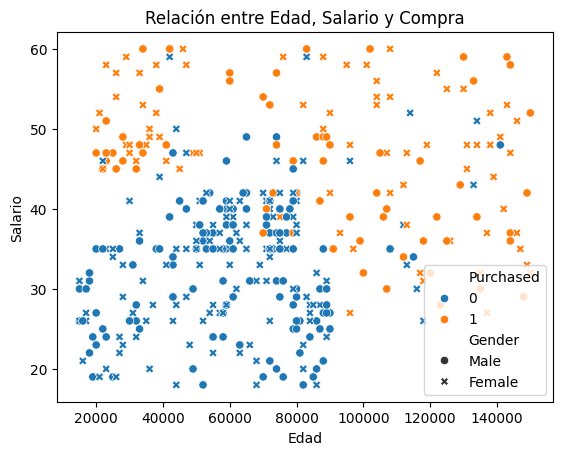

In [30]:
sns.scatterplot(data=data, x='EstimatedSalary', y='Age', hue='Purchased', style='Gender')
plt.title('Relación entre Edad, Salario y Compra')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show();